In [1]:
import pandas as pd

In [6]:
pd.date_range("2021-10-22", "2021-12-31", freq="W-MON")

DatetimeIndex(['2021-10-25', '2021-11-01', '2021-11-08', '2021-11-15',
               '2021-11-22', '2021-11-29', '2021-12-06', '2021-12-13',
               '2021-12-20', '2021-12-27'],
              dtype='datetime64[ns]', freq='W-MON')

In [7]:
pd.date_range("2021-10-24", "2021-11-01", freq="2D2H2MIN")

DatetimeIndex(['2021-10-24 00:00:00', '2021-10-26 02:02:00',
               '2021-10-28 04:04:00', '2021-10-30 06:06:00'],
              dtype='datetime64[ns]', freq='3002T')

In [9]:
pd.date_range("2021-01-01", "2022-01-01", freq="MS")

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [10]:
pd.date_range("2021-10-24", freq="1H15MIN", periods=4)

DatetimeIndex(['2021-10-24 00:00:00', '2021-10-24 01:15:00',
               '2021-10-24 02:30:00', '2021-10-24 03:45:00'],
              dtype='datetime64[ns]', freq='75T')

In [30]:
df = pd.read_csv("https://stooq.pl/q/d/l/?s=cdr&d1=20190101&d2=20211022&i=d", index_col="Data", parse_dates=True)
df.head(20)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2019-01-02,140.66,146.36,137.46,146.07,203661
2019-01-03,145.88,145.88,142.20,143.17,231128
2019-01-04,143.17,145.88,143.17,145.78,169481
2019-01-07,147.04,149.55,146.56,148.69,194329
2019-01-08,149.45,151.58,147.04,148.59,287699
2019-01-09,149.08,159.61,148.98,159.61,493246
2019-01-10,159.14,166.58,154.88,165.42,718516
2019-01-11,167.36,171.32,158.65,159.71,500823
2019-01-14,158.65,158.65,153.62,154.30,270866


In [17]:
df.index

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14',
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-18',
      

<AxesSubplot:xlabel='Data'>

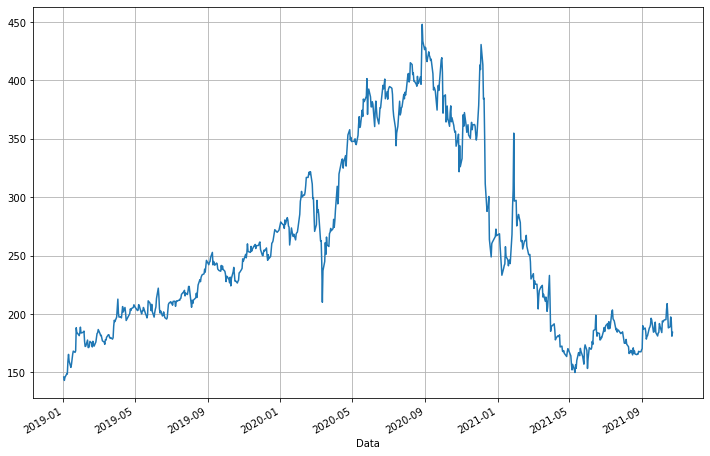

In [31]:
df.Zamkniecie.plot(figsize=(12,8), grid=True)

<AxesSubplot:xlabel='Data'>

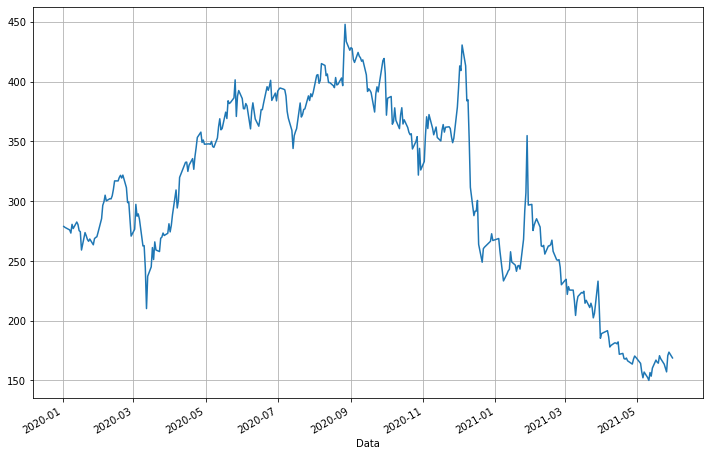

In [32]:
df.Zamkniecie.loc["2020":"2021-05"].plot(figsize=(12,8), grid=True)

<AxesSubplot:xlabel='Data'>

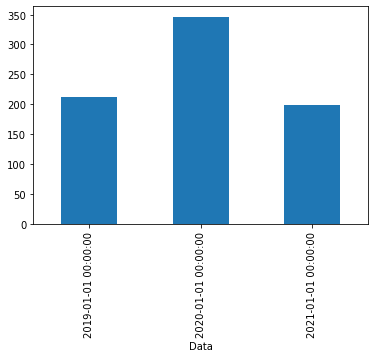

In [37]:
# resampling szeregu czasowego
df.Zamkniecie.resample("AS").mean().plot(kind='bar')

<AxesSubplot:xlabel='Data'>

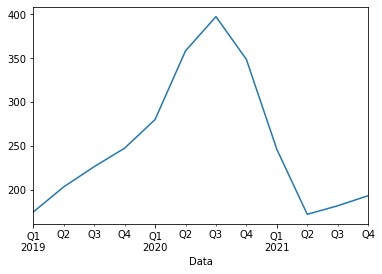

In [39]:
df.Zamkniecie.resample("QS").mean().plot()

<AxesSubplot:xlabel='Data'>

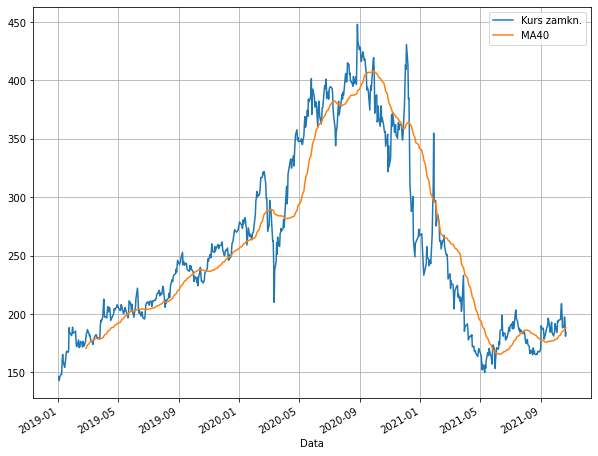

In [42]:
# srednia krocząca

chart1 = df.Zamkniecie
chart1.name = "Kurs zamkn."

chart2 = df.Zamkniecie.rolling(40).mean()
chart2.name = "MA40"

chart1.plot(legend=True)
chart2.plot(legend=True, grid=True, figsize=(10,8))

### Wstęga Bolingera

In [52]:
N = 30
line_ma = df.Zamkniecie.rolling(N).mean()
line_std = df.Zamkniecie.rolling(N).std()

In [53]:
line_up = line_ma + 2*line_std
line_down = line_ma - 2*line_std

In [54]:
df["Wst_gorna"] = line_up
df["Wst_dolna"] = line_down
df.head(30)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Wst_gorna,Wst_dolna
Data,,,,,,,
2019-01-02,140.66,146.36,137.46,146.07,203661,NaN,NaN
2019-01-03,145.88,145.88,142.20,143.17,231128,NaN,NaN
2019-01-04,143.17,145.88,143.17,145.78,169481,NaN,NaN
2019-01-07,147.04,149.55,146.56,148.69,194329,NaN,NaN
2019-01-08,149.45,151.58,147.04,148.59,287699,NaN,NaN
2019-01-09,149.08,159.61,148.98,159.61,493246,NaN,NaN
2019-01-10,159.14,166.58,154.88,165.42,718516,NaN,NaN
2019-01-11,167.36,171.32,158.65,159.71,500823,NaN,NaN
2019-01-14,158.65,158.65,153.62,154.30,270866,NaN,NaN


In [55]:
df1 = df[ ["Zamkniecie","Wst_gorna","Wst_dolna"] ]
df1.head()

,Zamkniecie,Wst_gorna,Wst_dolna
Data,,,
2019-01-02,146.07,NaN,NaN
2019-01-03,143.17,NaN,NaN
2019-01-04,145.78,NaN,NaN
2019-01-07,148.69,NaN,NaN
2019-01-08,148.59,NaN,NaN


In [56]:
import matplotlib.pyplot as plt

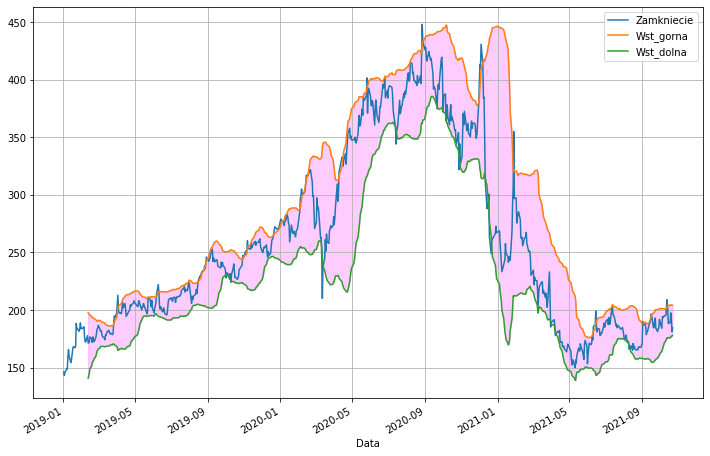

In [60]:
canvas = df1.plot(figsize=(12,8), grid=True)
canvas.fill_between(df1.index, df1.Wst_dolna, df1.Wst_gorna, color='magenta', alpha=0.2)